In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols, glm

### 1단계 : 데이터준비하기

In [3]:
import glob
import os

In [4]:
all_files = glob.glob(os.path.join('winequality*'))
all_files

['winequality-red.csv', 'winequality-white.csv']

In [5]:
all_data_frames = []
for file in all_files:
    data_frame = pd.read_csv(file, index_col=None, sep =';',header=0)
    all_data_frames.append(data_frame)
all_data_frames
    

[      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0               7.4             0.700         0.00             1.9      0.076   
 1               7.8             0.880         0.00             2.6      0.098   
 2               7.8             0.760         0.04             2.3      0.092   
 3              11.2             0.280         0.56             1.9      0.075   
 4               7.4             0.700         0.00             1.9      0.076   
 5               7.4             0.660         0.00             1.8      0.075   
 6               7.9             0.600         0.06             1.6      0.069   
 7               7.3             0.650         0.00             1.2      0.065   
 8               7.8             0.580         0.02             2.0      0.073   
 9               7.5             0.500         0.36             6.1      0.071   
 10              6.7             0.580         0.08             1.8      0.097   
 11             

In [7]:
wine = pd.concat(all_data_frames, axis=0, ignore_index=True)
wine.to_csv('winequality_both.csv')

In [10]:
wine

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00            1.90      0.076   
1               7.8             0.880         0.00            2.60      0.098   
2               7.8             0.760         0.04            2.30      0.092   
3              11.2             0.280         0.56            1.90      0.075   
4               7.4             0.700         0.00            1.90      0.076   
5               7.4             0.660         0.00            1.80      0.075   
6               7.9             0.600         0.06            1.60      0.069   
7               7.3             0.650         0.00            1.20      0.065   
8               7.8             0.580         0.02            2.00      0.073   
9               7.5             0.500         0.36            6.10      0.071   
10              6.7             0.580         0.08            1.80      0.097   
11              7.5             0.500         0.36            6.10      0.071   
12              5.6             0.615         0.00            1.60      0.089   
13              7.8             0.610         0.29            1.60      0.114   
14              8.9             0.620         0.18            3.80      0.176   
15              8.9             0.620         0.19            3.90      0.170   
16              8.5             0.280         0.56            1.80      0.092   
17              8.1             0.560         0.28            1.70      0.368   
18              7.4             0.590         0.08            4.40      0.086   
19              7.9             0.320         0.51            1.80      0.341   
20              8.9             0.220         0.48            1.80      0.077   
21              7.6             0.390         0.31            2.30      0.082   
22              7.9             0.430         0.21            1.60      0.106   
23              8.5             0.490         0.11            2.30      0.084   
24              6.9             0.400         0.14            2.40      0.085   
25              6.3             0.390         0.16            1.40      0.080   
26              7.6             0.410         0.24            1.80      0.080   
27              7.9             0.430         0.21            1.60      0.106   
28              7.1             0.710         0.00            1.90      0.080   
29              7.8             0.645         0.00            2.00      0.082   
...             ...               ...          ...             ...        ...   
6467            5.8             0.230         0.31            4.50      0.046   
6468            6.6             0.240         0.33           10.10      0.032   
6469            6.1             0.320         0.28            6.60      0.021   
6470            5.0             0.200         0.40            1.90      0.015   
6471            6.0             0.420         0.41           12.40      0.032   
6472            5.7             0.210         0.32            1.60      0.030   
6473            5.6             0.200         0.36            2.50      0.048   
6474            7.4             0.220         0.26            1.20      0.035   
6475            6.2             0.380         0.42            2.50      0.038   
6476            5.9             0.540         0.00            0.80      0.032   
6477            6.2             0.530         0.02            0.90      0.035   
6478            6.6             0.340         0.40            8.10      0.046   
6479            6.6             0.340         0.40            8.10      0.046   
6480            5.0             0.235         0.27           11.75      0.030   
6481            5.5             0.320         0.13            1.30      0.037   
6482            4.9             0.470         0.17            1.90      0.035   
6483            6.5             0.330         0.38            8.30      0.048   
6484            6.6             0.340

In [11]:
red_wine = pd.read_csv("winequality-red.csv", sep=';', header=0, index_col=None)
red_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [12]:
red_wine['type'] = "red"
red_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type  
0      9.4        5  red  
1      9.8        5  red  
2      9.8        5  red  
3      9.8        6  red  
4      9.4        5  red

In [13]:

white_wine = pd.read_csv("winequality-white.csv", sep=';', header=0, index_col=None)
white_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [14]:
white_wine['type'] = "white"
white_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality   type  
0      8.8        6  white  
1      9.5        6  white  
2     10.1        6  white  
3      9.9        6  white  
4      9.9        6  white

In [20]:
wine = pd.concat([red_wine, white_wine], axis=0)
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type  
0      9.4        5  red  
1      9.8        5  red  
2      9.8        5  red  
3      9.8        6  red  
4      9.4        5  red

In [23]:
wine.columns = wine.columns.str.replace(' ', '_')
wine.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [24]:
wine.quality.unique()

array([5, 6, 7, 4, 8, 3, 9])

In [25]:
wine.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

### 2단계: 탐색적분석

In [30]:
wine.groupby('type')[['quality','residual_sugar']].describe()

quality                                              residual_sugar  \
        count      mean       std  min  25%  50%  75%  max          count   
type                                                                        
red    1599.0  5.636023  0.807569  3.0  5.0  6.0  6.0  8.0         1599.0   
white  4898.0  5.877909  0.885639  3.0  5.0  6.0  6.0  9.0         4898.0   

                                                     
           mean       std  min  25%  50%  75%   max  
type                                                 
red    2.538806  1.409928  0.9  1.9  2.2  2.6  15.5  
white  6.391415  5.072058  0.6  1.7  5.2  9.9  65.8

In [31]:
wine.groupby('type')[['quality']].describe().unstack('type')

                type 
quality  count  red      1599.000000
                white    4898.000000
         mean   red         5.636023
                white       5.877909
         std    red         0.807569
                white       0.885639
         min    red         3.000000
                white       3.000000
         25%    red         5.000000
                white       5.000000
         50%    red         6.000000
                white       6.000000
         75%    red         6.000000
                white       6.000000
         max    red         8.000000
                white       9.000000
dtype: float64

In [34]:
red_wine = wine.loc[wine['type']=='red', 'quality']
white_wine = wine.loc[wine['type']=='white', 'quality']
print(red_wine.head())
print(white_wine.head())

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64
0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64


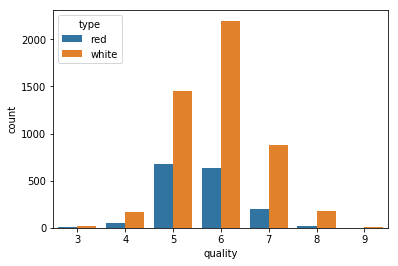

In [43]:
sns.countplot(data=wine, x='quality', hue='type')


/Users/kyung/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


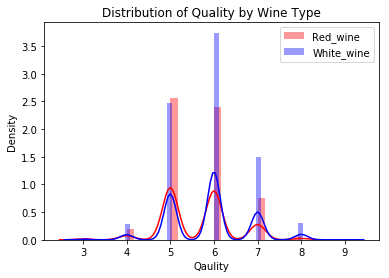

In [49]:
sns.distplot(red_wine, color='red', label="Red_wine")
sns.distplot(white_wine, color='blue', label="White_wine")
plt.xlabel("Qaulity")
plt.ylabel("Density")
plt.title("Distribution of Quality by Wine Type")
plt.legend()

- lessen learned:
- 두 그룹의 와인모두의 품질은 근사적으로 비슷한 정규분포를 따르고 있음


## T검정
- 와인 종류에 따른 품질의 차이가 통계적으로 유의한지 알기위해
- 두그룹의 표준편차 작기때문에 합동분산 t검정 실시한 예정
- p값이 0.0000유의한 수준 => 두그룹간 품질차이가 통계적으로 유의하다

In [50]:
wine.groupby(['type'])[['quality']].agg(['std','mean'])

quality          
            std      mean
type                     
red    0.807569  5.636023
white  0.885639  5.877909

In [51]:
tstat, pvalue, df = sm.stats.ttest_ind(red_wine, white_wine)
print('tstat: %.3f pvalue: %.4f'%(tstat, pvalue))

tstat:-9.686 pvalue: 0.0000


### 상관관계분석
- 모든변수들간 사이의 상관계수구함

In [52]:
wine.corr()

fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000          0.219008     0.324436   
volatile_acidity           0.219008          1.000000    -0.377981   
citric_acid                0.324436         -0.377981     1.000000   
residual_sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free_sulfur_dioxide       -0.282735         -0.352557     0.133126   
total_sulfur_dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity              -0.111981   0.298195            -0.282735   
volatile_acidity           -0.196011   0.377124            -0.352557   
citric_acid                 0.142451   0.038998             0.133126   
residual_sugar              1.000000  -0.128940             0.402871   
chlorides                  -0.128940   1.000000            -0.195045   
free_sulfur_dioxide         0.402871  -0.195045             1.000000   
total_sulfur_dioxide        0.495482  -0.279630             0.720934   
density                     0.552517   0.362615             0.025717   
pH                         -0.267320   0.044708            -0.145854   
sulphates                  -0.185927   0.395593            -0.188457   
alcohol                    -0.359415  -0.256916            -0.179838   
quality                    -0.036980  -0.200666             0.055463   

                      total_sulfur_dioxide   density        pH  sulphates  \
fixed_acidity                    -0.329054  0.458910 -0.252700   0.299568   
volatile_acidity                 -0.414476  0.271296  0.261454   0.225984   
citric_acid                       0.195242  0.096154 -0.329808   0.056197   
residual_sugar                    0.495482  0.552517 -0.267320  -0.185927   
chlorides                        -0.279630  0.362615  0.044708   0.395593   
free_sulfur_dioxide               0.720934  0.025717 -0.145854  -0.188457   
total_sulfur_dioxide              1.000000  0.032395 -0.238413  -0.275727   
density                           0.032395  1.000000  0.011686   0.259478   
pH                               -0.238413  0.011686  1.000000   0.192123   
sulphates                        -0.275727  0.259478  0.192123   1.000000   
alcohol                          -0.265740 -0.686745  0.121248  -0.003029   
quality                          -0.041385 -0.305858  0.019506   0.038485   

                       alcohol   quality  
fixed_acidity        -0.095452 -0.076743  
volatile_acidity     -0.037640 -0.265699  
citric_acid          -0.010493  0.085532  
residual_sugar       -0.359415 -0.036980  
chlorides            -0.256916 -0.200666  
free_sulfur_dioxide  -0.179838  0.055463  
total_sulfur_dioxide -0.265740 -0.041385  
density              -0.686745 -0.305858  
pH                    0.121248  0.019506  
sulphates            -0.003029  0.038485  
alcohol               1.000000  0.444319  
quality               0.444319  1.000000

- 알콜, 이산화황, 산성도, 구연산은 품질과 양의 상관관계가 있음
- 결합산, 휘발산, 잔여설탕, 염화물, 총이산화황, 밀도는 품질의 음의 상관관계

- 몇개의 변수들에 대해 회귀선을 포함한 산점도를 그려보자
- 몇개의 샘플만 표시 (6000개가 넘는 관측값을 그림으로 표시하면 보기가 힘듦)

In [60]:
def take_sample(data_frame, n=200):
    return data_frame.loc[np.random.choice(data_frame.index, size=n)]

In [61]:
reds = wine.loc[wine['type']=='red']
whites = wine.loc[wine['type']=='white']
whites

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.0             0.270         0.36           20.70      0.045   
1               6.3             0.300         0.34            1.60      0.049   
2               8.1             0.280         0.40            6.90      0.050   
3               7.2             0.230         0.32            8.50      0.058   
4               7.2             0.230         0.32            8.50      0.058   
5               8.1             0.280         0.40            6.90      0.050   
6               6.2             0.320         0.16            7.00      0.045   
7               7.0             0.270         0.36           20.70      0.045   
8               6.3             0.300         0.34            1.60      0.049   
9               8.1             0.220         0.43            1.50      0.044   
10              8.1             0.270         0.41            1.45      0.033   
11              8.6             0.230         0.40            4.20      0.035   
12              7.9             0.180         0.37            1.20      0.040   
13              6.6             0.160         0.40            1.50      0.044   
14              8.3             0.420         0.62           19.25      0.040   
15              6.6             0.170         0.38            1.50      0.032   
16              6.3             0.480         0.04            1.10      0.046   
17              6.2             0.660         0.48            1.20      0.029   
18              7.4             0.340         0.42            1.10      0.033   
19              6.5             0.310         0.14            7.50      0.044   
20              6.2             0.660         0.48            1.20      0.029   
21              6.4             0.310         0.38            2.90      0.038   
22              6.8             0.260         0.42            1.70      0.049   
23              7.6             0.670         0.14            1.50      0.074   
24              6.6             0.270         0.41            1.30      0.052   
25              7.0             0.250         0.32            9.00      0.046   
26              6.9             0.240         0.35            1.00      0.052   
27              7.0             0.280         0.39            8.70      0.051   
28              7.4             0.270         0.48            1.10      0.047   
29              7.2             0.320         0.36            2.00      0.033   
...             ...               ...          ...             ...        ...   
4868            5.8             0.230         0.31            4.50      0.046   
4869            6.6             0.240         0.33           10.10      0.032   
4870            6.1             0.320         0.28            6.60      0.021   
4871            5.0             0.200         0.40            1.90      0.015   
4872            6.0             0.420         0.41           12.40      0.032   
4873            5.7             0.210         0.32            1.60      0.030   
4874            5.6             0.200         0.36            2.50      0.048   
4875            7.4             0.220         0.26            1.20      0.035   
4876            6.2             0.380         0.42            2.50      0.038   
4877            5.9             0.540         0.00            0.80      0.032   
4878            6.2             0.530         0.02            0.90      0.035   
4879            6.6             0.340         0.40            8.10      0.046   
4880            6.6             0.340         0.40            8.10      0.046   
4881            5.0             0.235         0.27           11.75      0.030   
4882            5.5             0.320         0.13            1.30      0.037   
4883            4.9             0.470         0.17            1.90      0.035   
4884            6.5             0.330         0.38            8.30      0.048   
4885            6.6             0.340

In [62]:
red_sample = take_sample(reds)
red_sample.shape

(200, 13)

In [63]:
white_sample = take_sample(whites)
white_sample.shape

(200, 13)

In [64]:
wine_sample = pd.concat([red_sample, white_sample])
wine_sample.shape

(400, 13)

In [65]:
wine['in_sample'] = np.where(wine.index.isin(wine_sample.index),1,0)
wine

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4             0.700         0.00            1.90      0.076   
1               7.8             0.880         0.00            2.60      0.098   
2               7.8             0.760         0.04            2.30      0.092   
3              11.2             0.280         0.56            1.90      0.075   
4               7.4             0.700         0.00            1.90      0.076   
5               7.4             0.660         0.00            1.80      0.075   
6               7.9             0.600         0.06            1.60      0.069   
7               7.3             0.650         0.00            1.20      0.065   
8               7.8             0.580         0.02            2.00      0.073   
9               7.5             0.500         0.36            6.10      0.071   
10              6.7             0.580         0.08            1.80      0.097   
11              7.5             0.500         0.36            6.10      0.071   
12              5.6             0.615         0.00            1.60      0.089   
13              7.8             0.610         0.29            1.60      0.114   
14              8.9             0.620         0.18            3.80      0.176   
15              8.9             0.620         0.19            3.90      0.170   
16              8.5             0.280         0.56            1.80      0.092   
17              8.1             0.560         0.28            1.70      0.368   
18              7.4             0.590         0.08            4.40      0.086   
19              7.9             0.320         0.51            1.80      0.341   
20              8.9             0.220         0.48            1.80      0.077   
21              7.6             0.390         0.31            2.30      0.082   
22              7.9             0.430         0.21            1.60      0.106   
23              8.5             0.490         0.11            2.30      0.084   
24              6.9             0.400         0.14            2.40      0.085   
25              6.3             0.390         0.16            1.40      0.080   
26              7.6             0.410         0.24            1.80      0.080   
27              7.9             0.430         0.21            1.60      0.106   
28              7.1             0.710         0.00            1.90      0.080   
29              7.8             0.645         0.00            2.00      0.082   
...             ...               ...          ...             ...        ...   
4868            5.8             0.230         0.31            4.50      0.046   
4869            6.6             0.240         0.33           10.10      0.032   
4870            6.1             0.320         0.28            6.60      0.021   
4871            5.0             0.200         0.40            1.90      0.015   
4872            6.0             0.420         0.41           12.40      0.032   
4873            5.7             0.210         0.32            1.60      0.030   
4874            5.6             0.200         0.36            2.50      0.048   
4875            7.4             0.220         0.26            1.20      0.035   
4876            6.2             0.380         0.42            2.50      0.038   
4877            5.9             0.540         0.00            0.80      0.032   
4878            6.2             0.530         0.02            0.90      0.035   
4879            6.6             0.340         0.40            8.10      0.046   
4880            6.6             0.340         0.40            8.10      0.046   
4881            5.0             0.235         0.27           11.75      0.030   
4882            5.5             0.320         0.13            1.30      0.037   
4883            4.9             0.470         0.17            1.90      0.035   
4884            6.5             0.330         0.38            8.30      0.048   
4885            6.6             0.340

In [66]:
pd.crosstab(wine.in_sample, wine.type)

type        red  white
in_sample             
0          1358   4527
1           241    371

/Users/kyung/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


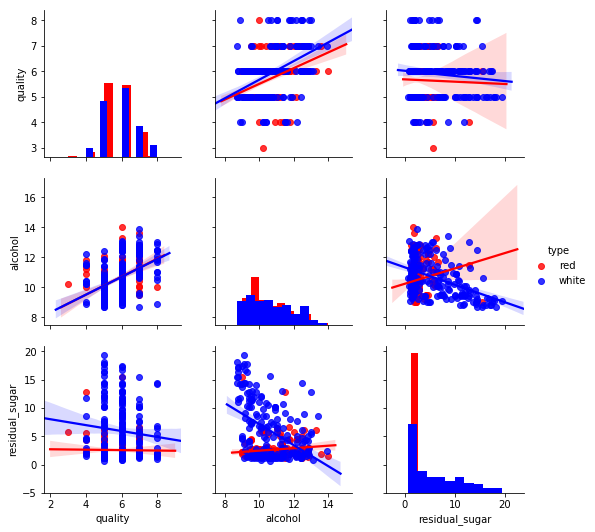

In [73]:
sns.pairplot(wine_sample, kind='reg', diag_kind='hist', palette = dict(red='red', white='blue'), hue='type',vars=['quality', 'alcohol', 'residual_sugar'])

- Lesson learnd:
- 알콜도수의 표준변차와 평균은 두그룹의 비슷하다
- 잔여설탕의 평균과 표준편차는 화이트와인 레드와인보다 크다
- 회귀선을 보면 와인종류와 관계없이 알콜 도수가 증가하면 품질이 높아진다. 다만 정도가 화이트와인 약간 더 쎄다
- 잔여설탕이 증가하면 약간 더 낮아진다


### 3단계: 예측모델생성하기

- 최소제곱법을 이용한 선형회귀분석
- 왜? 각각의 독립변수(X)가 종속변수(quality -y)에 미치는 관계를 측정하기 위해
- 선형회귀 : 독립변수가 통제된 상태에서 독립변수와 종속변수 사이의 관계를 파악

In [75]:
wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type', 'in_sample'],
      dtype='object')

In [78]:
wine.loc[wine['type']=='red', 'type_encode'] = 0
wine.loc[wine['type']=='white', 'type_encode'] = 1
wine

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4             0.700         0.00            1.90      0.076   
1               7.8             0.880         0.00            2.60      0.098   
2               7.8             0.760         0.04            2.30      0.092   
3              11.2             0.280         0.56            1.90      0.075   
4               7.4             0.700         0.00            1.90      0.076   
5               7.4             0.660         0.00            1.80      0.075   
6               7.9             0.600         0.06            1.60      0.069   
7               7.3             0.650         0.00            1.20      0.065   
8               7.8             0.580         0.02            2.00      0.073   
9               7.5             0.500         0.36            6.10      0.071   
10              6.7             0.580         0.08            1.80      0.097   
11              7.5             0.500         0.36            6.10      0.071   
12              5.6             0.615         0.00            1.60      0.089   
13              7.8             0.610         0.29            1.60      0.114   
14              8.9             0.620         0.18            3.80      0.176   
15              8.9             0.620         0.19            3.90      0.170   
16              8.5             0.280         0.56            1.80      0.092   
17              8.1             0.560         0.28            1.70      0.368   
18              7.4             0.590         0.08            4.40      0.086   
19              7.9             0.320         0.51            1.80      0.341   
20              8.9             0.220         0.48            1.80      0.077   
21              7.6             0.390         0.31            2.30      0.082   
22              7.9             0.430         0.21            1.60      0.106   
23              8.5             0.490         0.11            2.30      0.084   
24              6.9             0.400         0.14            2.40      0.085   
25              6.3             0.390         0.16            1.40      0.080   
26              7.6             0.410         0.24            1.80      0.080   
27              7.9             0.430         0.21            1.60      0.106   
28              7.1             0.710         0.00            1.90      0.080   
29              7.8             0.645         0.00            2.00      0.082   
...             ...               ...          ...             ...        ...   
4868            5.8             0.230         0.31            4.50      0.046   
4869            6.6             0.240         0.33           10.10      0.032   
4870            6.1             0.320         0.28            6.60      0.021   
4871            5.0             0.200         0.40            1.90      0.015   
4872            6.0             0.420         0.41           12.40      0.032   
4873            5.7             0.210         0.32            1.60      0.030   
4874            5.6             0.200         0.36            2.50      0.048   
4875            7.4             0.220         0.26            1.20      0.035   
4876            6.2             0.380         0.42            2.50      0.038   
4877            5.9             0.540         0.00            0.80      0.032   
4878            6.2             0.530         0.02            0.90      0.035   
4879            6.6             0.340         0.40            8.10      0.046   
4880            6.6             0.340         0.40            8.10      0.046   
4881            5.0             0.235         0.27           11.75      0.030   
4882            5.5             0.320         0.13            1.30      0.037   
4883            4.9             0.470         0.17            1.90      0.035   
4884            6.5             0.330         0.38            8.30      0.048   
4885            6.6             0.340

In [79]:
wine_type = pd.get_dummies(wine['type'])
wine_type

red  white
0       1      0
1       1      0
2       1      0
3       1      0
4       1      0
5       1      0
6       1      0
7       1      0
8       1      0
9       1      0
10      1      0
11      1      0
12      1      0
13      1      0
14      1      0
15      1      0
16      1      0
17      1      0
18      1      0
19      1      0
20      1      0
21      1      0
22      1      0
23      1      0
24      1      0
25      1      0
26      1      0
27      1      0
28      1      0
29      1      0
...   ...    ...
4868    0      1
4869    0      1
4870    0      1
4871    0      1
4872    0      1
4873    0      1
4874    0      1
4875    0      1
4876    0      1
4877    0      1
4878    0      1
4879    0      1
4880    0      1
4881    0      1
4882    0      1
4883    0      1
4884    0      1
4885    0      1
4886    0      1
4887    0      1
4888    0      1
4889    0      1
4890    0      1
4891    0      1
4892    0      1
4893    0      1
4894    0      1
4895    0      1
4896    0      1
4897    0      1

[6497 rows x 2 columns]

In [80]:
wine = pd.concat([wine,wine_type], axis=1)
wine

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4             0.700         0.00            1.90      0.076   
1               7.8             0.880         0.00            2.60      0.098   
2               7.8             0.760         0.04            2.30      0.092   
3              11.2             0.280         0.56            1.90      0.075   
4               7.4             0.700         0.00            1.90      0.076   
5               7.4             0.660         0.00            1.80      0.075   
6               7.9             0.600         0.06            1.60      0.069   
7               7.3             0.650         0.00            1.20      0.065   
8               7.8             0.580         0.02            2.00      0.073   
9               7.5             0.500         0.36            6.10      0.071   
10              6.7             0.580         0.08            1.80      0.097   
11              7.5             0.500         0.36            6.10      0.071   
12              5.6             0.615         0.00            1.60      0.089   
13              7.8             0.610         0.29            1.60      0.114   
14              8.9             0.620         0.18            3.80      0.176   
15              8.9             0.620         0.19            3.90      0.170   
16              8.5             0.280         0.56            1.80      0.092   
17              8.1             0.560         0.28            1.70      0.368   
18              7.4             0.590         0.08            4.40      0.086   
19              7.9             0.320         0.51            1.80      0.341   
20              8.9             0.220         0.48            1.80      0.077   
21              7.6             0.390         0.31            2.30      0.082   
22              7.9             0.430         0.21            1.60      0.106   
23              8.5             0.490         0.11            2.30      0.084   
24              6.9             0.400         0.14            2.40      0.085   
25              6.3             0.390         0.16            1.40      0.080   
26              7.6             0.410         0.24            1.80      0.080   
27              7.9             0.430         0.21            1.60      0.106   
28              7.1             0.710         0.00            1.90      0.080   
29              7.8             0.645         0.00            2.00      0.082   
...             ...               ...          ...             ...        ...   
4868            5.8             0.230         0.31            4.50      0.046   
4869            6.6             0.240         0.33           10.10      0.032   
4870            6.1             0.320         0.28            6.60      0.021   
4871            5.0             0.200         0.40            1.90      0.015   
4872            6.0             0.420         0.41           12.40      0.032   
4873            5.7             0.210         0.32            1.60      0.030   
4874            5.6             0.200         0.36            2.50      0.048   
4875            7.4             0.220         0.26            1.20      0.035   
4876            6.2             0.380         0.42            2.50      0.038   
4877            5.9             0.540         0.00            0.80      0.032   
4878            6.2             0.530         0.02            0.90      0.035   
4879            6.6             0.340         0.40            8.10      0.046   
4880            6.6             0.340         0.40            8.10      0.046   
4881            5.0             0.235         0.27           11.75      0.030   
4882            5.5             0.320         0.13            1.30      0.037   
4883            4.9             0.470         0.17            1.90      0.035   
4884            6.5             0.330         0.38            8.30      0.048   
4885            6.6             0.340

In [81]:
wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type', 'in_sample',
       'type_encode', 'red', 'white'],
      dtype='object')

In [117]:
my_formula1 = 'quality ~ alcohol + residual_sugar + free_sulfur_dioxide +pH+density'
my_formula_all = 'quality ~ fixed_acidity +volatile_acidity+citric_acid+citric_acid+chlorides+free_sulfur_dioxide+total_sulfur_dioxide+density+pH+sulphates+alcohol+red+white'
my_formula_simple = 'quality ~ alcohol + residual_sugar'

In [118]:
model = ols(my_formula_simple, wine).fit()

In [119]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     887.8
Date:                Fri, 24 May 2019   Prob (F-statistic):               0.00
Time:                        16:19:38   Log-Likelihood:                -7552.6
No. Observations:                6497   AIC:                         1.511e+04
Df Residuals:                    6494   BIC:                         1.513e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.8754      0.096     19.562      0.000       1.687       2.063
alcohol            0.3624      0.009     42.003      0.000       0.345       0.379
residual_sugar     0.0259      0.002     11.958      0.000       0.022       0.030
==============================================================================
Omnibus:                      122.883   Durbin-Watson:                   1.664
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.656
Skew:                           0.007   Prob(JB):                     1.12e-56
Kurtosis:                       3.975   Cond. No.                         121.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
model.params

Intercept         1.875422
alcohol           0.362394
residual_sugar    0.025864
dtype: float64

In [121]:
model.bse

Intercept         0.095869
alcohol           0.008628
residual_sugar    0.002163
dtype: float64

In [122]:
model.rsquared_adj

0.21446970145579913

In [123]:
model.fvalue

887.7864060996986

In [124]:
model.f_pvalue

0.0

- 독립변수의 표준화의 중요성

- OLS(보통최소제곱법)의 잔차의 제곱합을 최소화하는 기법으로 회귀선을 찾는다
- 잔차?? 관측값-적합값
- 독립변수의 측정단위에 따라 크기가 크게 달라짐
- 독립변수를 표준화해야한다
- 표준화? 변수의 관측값에서 평균을 빼고 그 결과를 표준편차로 나누는것
- 표준화된 변수는 평균은 0, 표준편차 1

In [136]:
y = wine['quality']
x = wine[wine.columns.difference(['quality', 'type', 'type_encode', 'in_sample'])]
x_standardized =(x-x.mean())/x.std()

In [141]:
wine_standardized = pd.concat([y,x_standardized], axis=1)
model2 = ols(my_formula_simple, data=wine_standardized).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     887.8
Date:                Fri, 24 May 2019   Prob (F-statistic):               0.00
Time:                        16:38:56   Log-Likelihood:                -7552.6
No. Observations:                6497   AIC:                         1.511e+04
Df Residuals:                    6494   BIC:                         1.513e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.8184      0.010    605.948      0.000       5.800       5.837
alcohol            0.4322      0.010     42.003      0.000       0.412       0.452
residual_sugar     0.1231      0.010     11.958      0.000       0.103       0.143
==============================================================================
Omnibus:                      122.883   Durbin-Watson:                   1.664
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.656
Skew:                           0.007   Prob(JB):                     1.12e-56
Kurtosis:                       3.975   Cond. No.                         1.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [142]:
wine_standardized.head()

quality   alcohol  chlorides  citric_acid   density  fixed_acidity  \
0        5 -0.915394   0.569914    -2.192664  1.034913       0.142462   
1        5 -0.580023   1.197883    -2.192664  0.701432       0.451001   
2        5 -0.580023   1.026618    -1.917405  0.768128       0.451001   
3        6 -0.580023   0.541370     1.660957  1.101609       3.073580   
4        5 -0.915394   0.569914    -2.192664  1.034913       0.142462   

   free_sulfur_dioxide        pH       red  residual_sugar  sulphates  \
0            -1.100055  1.812950  1.750055       -0.744721   0.193082   
1            -0.311296 -0.115064  1.750055       -0.597594   0.999502   
2            -0.874695  0.258100  1.750055       -0.660648   0.797897   
3            -0.762016 -0.363840  1.750055       -0.744721   0.327485   
4            -1.100055  1.812950  1.750055       -0.744721   0.193082   

   total_sulfur_dioxide  volatile_acidity     white  
0             -1.446247          2.188664 -1.750055  
1             -0.862402          3.281982 -1.750055  
2             -1.092402          2.553104 -1.750055  
3             -0.986248         -0.362411 -1.750055  
4             -1.446247          2.188664 -1.750055

## 예측하기

In [144]:
X_test = wine.loc[wine.index.isin(range(10)), x.columns]
X_test

alcohol  chlorides  citric_acid  density  fixed_acidity  \
0      9.4      0.076         0.00   0.9978            7.4   
1      9.8      0.098         0.00   0.9968            7.8   
2      9.8      0.092         0.04   0.9970            7.8   
3      9.8      0.075         0.56   0.9980           11.2   
4      9.4      0.076         0.00   0.9978            7.4   
5      9.4      0.075         0.00   0.9978            7.4   
6      9.4      0.069         0.06   0.9964            7.9   
7     10.0      0.065         0.00   0.9946            7.3   
8      9.5      0.073         0.02   0.9968            7.8   
9     10.5      0.071         0.36   0.9978            7.5   
0      8.8      0.045         0.36   1.0010            7.0   
1      9.5      0.049         0.34   0.9940            6.3   
2     10.1      0.050         0.40   0.9951            8.1   
3      9.9      0.058         0.32   0.9956            7.2   
4      9.9      0.058         0.32   0.9956            7.2   
5     10.1      0.050         0.40   0.9951            8.1   
6      9.6      0.045         0.16   0.9949            6.2   
7      8.8      0.045         0.36   1.0010            7.0   
8      9.5      0.049         0.34   0.9940            6.3   
9     11.0      0.044         0.43   0.9938            8.1   

   free_sulfur_dioxide    pH  red  residual_sugar  sulphates  \
0                 11.0  3.51    1             1.9       0.56   
1                 25.0  3.20    1             2.6       0.68   
2                 15.0  3.26    1             2.3       0.65   
3                 17.0  3.16    1             1.9       0.58   
4                 11.0  3.51    1             1.9       0.56   
5                 13.0  3.51    1             1.8       0.56   
6                 15.0  3.30    1             1.6       0.46   
7                 15.0  3.39    1             1.2       0.47   
8                  9.0  3.36    1             2.0       0.57   
9                 17.0  3.35    1             6.1       0.80   
0                 45.0  3.00    0            20.7       0.45   
1                 14.0  3.30    0             1.6       0.49   
2                 30.0  3.26    0             6.9       0.44   
3                 47.0  3.19    0             8.5       0.40   
4                 47.0  3.19    0             8.5       0.40   
5                 30.0  3.26    0             6.9       0.44   
6                 30.0  3.18    0             7.0       0.47   
7                 45.0  3.00    0            20.7       0.45   
8                 14.0  3.30    0             1.6       0.49   
9                 28.0  3.22    0             1.5       0.45   

   total_sulfur_dioxide  volatile_acidity  white  
0                  34.0              0.70      0  
1                  67.0              0.88      0  
2                  54.0              0.76      0  
3                  60.0              0.28      0  
4                  34.0              0.70      0  
5                  40.0              0.66      0  
6                  59.0              0.60      0  
7                  21.0              0.65      0  
8                  18.0              0.58      0  
9                 102.0              0.50      0  
0                 170.0              0.27      1  
1                 132.0              0.30      1  
2                  97.0              0.28      1  
3                 186.0              0.23      1  
4                 186.0              0.23      1  
5                  97.0              0.28      1  
6                 136.0              0.32      1  
7                 170.0              0.27      1  
8                 132.0              0.30      1  
9                 129.0              0.22      1

In [145]:
prediction = model2.predict(X_test)
prediction

0    10.115168
1    10.374201
2    10.337283
3    10.288061
4    10.115168
5    10.102862
6    10.078251
7    10.288367
8    10.170697
9    11.107463
0    12.169304
1    10.121474
2    11.033016
3    11.143461
4    11.143461
5    11.033016
6    10.829206
7    12.169304
8    10.121474
9    10.757516
dtype: float64